# 0 TCLab Overview

The following cells in this notebook demonstrate the use of the Temperature Control Lab.

## The TCLab `Historian`

### Basic logging

The `Historian` class provides data logging. Given an instance of a TCLab object, an Historian is created with the command

    h = Historian(a.sources)
    
The historian initializes a data log. The data log is updated by issuing a command

    h.update(t)
    
Where `t` is the current clock time. If `t` is omitted, the historian will calculate its own time.

In [17]:
from tclab import TCLab, clock, Historian

with TCLab() as a:
    h = Historian(a.sources)
    for t in clock(10):
        a.Q1(100 if t <= 10 else 0)
        print("Time:", t, 'seconds')
        h.update(t)        

Connecting to TCLab
TCLab Firmware Version 1.2.1 connected on port /dev/cu.wchusbserial1410
Time: 0.0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
TCLab disconnected successfully.


### Accessing the Data Log from the Historian

`Historian` maintains a data log that is updated on each encounter of the `.update()` function. Individual time series are available as elements of `Historian.fields`:

    t, T1, T2, Q1, Q2 = h.fields 

For example, here's how to plot the history of temperature T1 versus time from the example above.

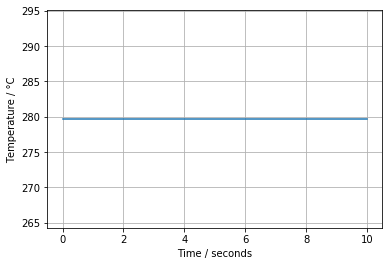

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

t, T1, T2, Q1, Q2 = h.fields 
plt.plot(t, T1)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()

The entire data history is available from the historian as the attribute `.log`. Here we show the first three rows from the log:

In [12]:
h.log[:3]

[(0, 37.33, 28.31, 0.0, 0.0),
 (0.0, 37.01, 28.63, 100.0, 0.0),
 (1.0, 37.33, 28.63, 100.0, 0.0)]

### Accessing log data via Pandas

Here's an example of how the log can be converted to a Pandas dataframe.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.head()

,T1,T2,Q1,Q2
Time,,,,
0.0,37.33,28.31,0.0,0.0
0.0,37.01,28.63,100.0,0.0
1.0,37.33,28.63,100.0,0.0
2.0,37.66,28.96,100.0,0.0
3.0,37.66,28.96,100.0,0.0


The following cells provide examples of plots that can be constructed once the data log has been converted to a pandas dataframe.

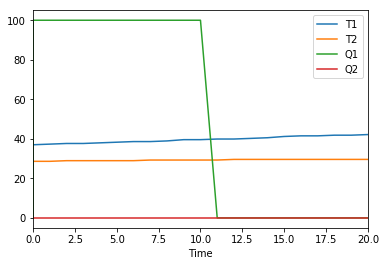

In [14]:
df.plot()

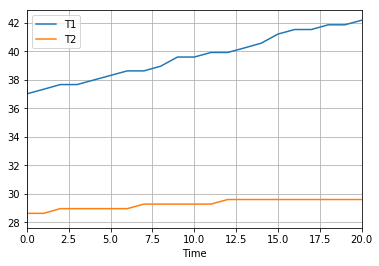

In [15]:
df[['T1','T2']].plot(grid=True)

### Real time plots with Plotter
When operating in a Jupyter Notebook, a `Plotter` can be used together with the `Historian`.  

    h = Historian(a)
    p = Plotter(h, tfinal)
    
where `a` is a `TCLab` instance as before and the optional parameter `tfinal` provides an initial scaling of the time axes. Each call to `p.update()` will automatically update both the historian and the plot.

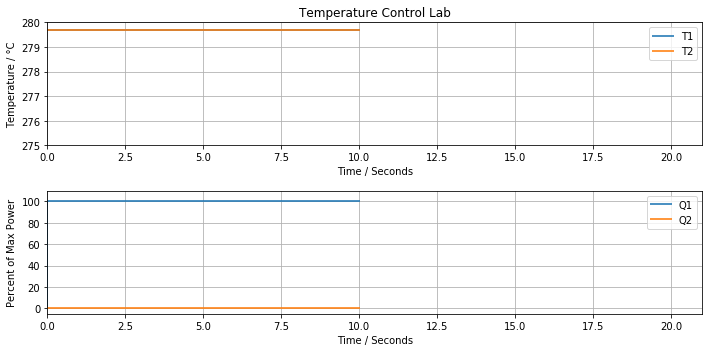

TCLab disconnected successfully.


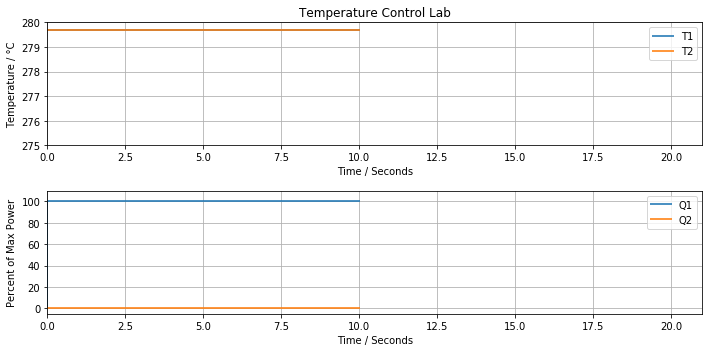

In [1]:
%matplotlib inline
from tclab import TCLab, clock, Historian, jeffPlotter

with TCLab() as a:
    h = Historian(a.sources)
    p = jeffPlotter(h)
    for t in clock(10):
        a.Q1(100 if t <= 100 else 0)
        p.update(t)